In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset as pandas dataframe

In [3]:
df = pd.read_json("data/Cu_FHIaims-PBE-dataset.json", orient="records")

In [4]:
df

,COORDINATES_TYPE,_COORDINATES,_OCCUPATION,NUMBER_OF_ATOMS,energy,forces,pbc,cell,energy_corrected,energy_corrected_per_atom,dmin,w_energy,w_forces
0,relative,"[[0.0, 0.0, 0.0], [0.8160455395, 0.0801130089,...","[Cu, Cu]",2,-9.048644e+04,"[[-0.1915810373, 0.0379360839, 0.4867174382], ...",True,"[[4.848667, 0.0, 1.908224], [-5.75563299999999...",-1.525491,-0.762745,3.556000,2.480000e-08,"[5.145e-07, 5.145e-07]"
1,absolute,"[[0.0, 0.0, 0.0], [5.57258, 0.0, 0.0], [4.1794...","[Cu, Cu, Cu, Cu]",4,-1.809703e+05,"[[0.0698542207, 0.0068889898, 0.0002778336], [...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-0.476400,-0.119100,4.620538,1.830000e-08,"[4.822e-07, 4.467e-07, 4.207e-07, 4.4590000000..."
2,relative,"[[0.0, 0.0, 0.0], [0.4123217421, 0.50162497540...","[Cu, Cu]",2,-9.048508e+04,"[[-0.027534297000000003, 0.1173325365, 0.14462...",True,"[[6.391525, 0.0, -2.533046], [4.143618, 6.1084...",-0.172775,-0.086388,5.080000,1.810000e-08,"[4.6140000000000004e-07, 4.6140000000000004e-07]"
3,absolute,"[[0.0, 0.0, 0.0], [4.556401, 1.091969, -1.0795...","[Cu, Cu, Cu, Cu]",4,-1.809728e+05,"[[-0.0855274058, 2.5143827853, 2.3198918138], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-2.956170,-0.739043,1.992502,2.450000e-08,"[5.1e-08, 6.446e-07, 3.8580000000000003e-07, 4..."
4,relative,"[[0.6496935505, 0.3274752788, 0.5129023611], [...","[Cu, Cu, Cu]",3,-1.357317e+05,"[[-0.1535250974, -0.047388247, 0.0613077861000...",True,"[[6.143789, -0.257681, -0.07058199999999999], ...",-4.343759,-1.447920,3.353072,3.640000e-08,"[9.339000000000001e-07, 9.127000000000001e-07,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,relative,"[[0.9992060749, 0.9988812033000001, 0.00024098...","[Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, C...",64,-2.895646e+06,"[[0.7775767163, 0.8774227657, 0.8838033854], [...",True,"[[22.348278, -0.03418, 0.406474], [-0.129683, ...",-129.243905,-2.019436,2.706277,5.360000e-08,"[4.485e-07, 1.4146e-06, 6.605000000000001e-07,..."
49996,absolute,"[[0.0, 0.0, 0.0], [1.2465, 1.2465, 1.2465], [2...","[Cu, Cu, Cu, Cu]",4,-1.809751e+05,"[[-0.32807977050000003, -0.3364480854, -0.3465...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-5.288324,-1.322081,2.159001,3.370000e-08,"[6.646000000000001e-07, 6.208000000000001e-07,..."
49997,absolute,"[[0.0, 0.0, 0.0], [3.07959, 0.0, 0.0], [4.6193...","[Cu, Cu, Cu, Cu]",4,-1.809718e+05,"[[1.3767464346, -0.0029550472, -0.0025562335],...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-1.955557,-0.488889,3.079590,2.170000e-08,"[1.98e-07, 1.997e-07, 4.575e-07, 4.58000000000..."
49998,absolute,"[[0.0, 0.0, 0.0], [4.49013, 0.0, 0.0], [0.0, 2...","[Cu, Cu, Cu, Cu, Cu]",5,-2.262168e+05,"[[0.4589911486, -0.1556204391, 1.4022477784], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-4.513183,-0.902637,3.174994,2.670000e-08,"[2.203e-07, 3.186e-07, 3.199e-07, 2.6750000000..."


In [5]:
df.shape

(50000, 13)

In [6]:
df.head(10)

,COORDINATES_TYPE,_COORDINATES,_OCCUPATION,NUMBER_OF_ATOMS,energy,forces,pbc,cell,energy_corrected,energy_corrected_per_atom,dmin,w_energy,w_forces
0,relative,"[[0.0, 0.0, 0.0], [0.8160455395, 0.0801130089,...","[Cu, Cu]",2,-90486.436230,"[[-0.1915810373, 0.0379360839, 0.4867174382], ...",True,"[[4.848667, 0.0, 1.908224], [-5.75563299999999...",-1.525491,-0.762745,3.556000,2.480000e-08,"[5.145e-07, 5.145e-07]"
1,absolute,"[[0.0, 0.0, 0.0], [5.57258, 0.0, 0.0], [4.1794...","[Cu, Cu, Cu, Cu]",4,-180970.297879,"[[0.0698542207, 0.0068889898, 0.0002778336], [...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-0.476400,-0.119100,4.620538,1.830000e-08,"[4.822e-07, 4.467e-07, 4.207e-07, 4.4590000000..."
2,relative,"[[0.0, 0.0, 0.0], [0.4123217421, 0.50162497540...","[Cu, Cu]",2,-90485.083515,"[[-0.027534297000000003, 0.1173325365, 0.14462...",True,"[[6.391525, 0.0, -2.533046], [4.143618, 6.1084...",-0.172775,-0.086388,5.080000,1.810000e-08,"[4.6140000000000004e-07, 4.6140000000000004e-07]"
3,absolute,"[[0.0, 0.0, 0.0], [4.556401, 1.091969, -1.0795...","[Cu, Cu, Cu, Cu]",4,-180972.777650,"[[-0.0855274058, 2.5143827853, 2.3198918138], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-2.956170,-0.739043,1.992502,2.450000e-08,"[5.1e-08, 6.446e-07, 3.8580000000000003e-07, 4..."
4,relative,"[[0.6496935505, 0.3274752788, 0.5129023611], [...","[Cu, Cu, Cu]",3,-135731.709869,"[[-0.1535250974, -0.047388247, 0.0613077861000...",True,"[[6.143789, -0.257681, -0.07058199999999999], ...",-4.343759,-1.447920,3.353072,3.640000e-08,"[9.339000000000001e-07, 9.127000000000001e-07,..."
5,absolute,"[[0.0, 0.0, 0.0], [1.61645, 0.0, 1.61645], [1....","[Cu, Cu, Cu, Cu]",4,-180974.670673,"[[-0.6176144783, -0.8761094019000001, 0.258511...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-4.849193,-1.212298,2.286006,3.170000e-08,"[3.773e-07, 7.582e-07, 5.727e-07, 5.4050000000..."
6,absolute,"[[0.0, 0.0, 0.0], [-1.6131199999999999, 1.6131...","[Cu, Cu, Cu, Cu]",4,-180970.159414,"[[0.0227811696, 0.0289627116, -0.0781500772], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-0.337934,-0.084484,4.562585,1.810000e-08,"[4.738e-07, 4.16e-07, 4.235e-07, 4.773e-07]"
7,relative,"[[0.0, 0.0, 0.0], [0.9652789309, 0.4831846134,...","[Cu, Cu]",2,-90486.136238,"[[0.1264675833, -0.060561094600000004, 0.22545...",True,"[[3.60428, 0.0, -1.8775680000000001], [1.16378...",-1.225498,-0.612749,4.064000,2.300000e-08,"[5.686e-07, 5.686e-07]"
8,relative,"[[0.0131432118, 0.9860287683000001, 0.99278196...","[Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, C...",16,-723879.321694,"[[-0.0010557207, -0.0035592191000000002, -0.00...",True,"[[7.697516, -13.531654, -0.346642], [7.535715,...",-0.035777,-0.002236,7.037269,1.740000e-08,"[4.608e-07, 4.608e-07, 4.608e-07, 4.608e-07, 4..."
9,absolute,"[[0.0, 0.0, 0.0], [-2.13106, 4.368136, 3.69147...","[Cu, Cu, Cu, Cu, Cu]",5,-226215.515302,"[[-0.2179051853, -0.2102716822, 0.4171962212],...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-3.238453,-0.647691,2.152298,2.340000e-08,"[4.892e-07, 6.179e-07, 3.483e-07, 3.945e-07, 4..."


# Statistic of the dataset

Number of periodic and non-periodic structures:

In [7]:
df["pbc"].value_counts()

pbc
True     26420
False    23580
Name: count, dtype: int64

Distribution of the periodic structures by number of atoms

Text(0.5, 1.0, 'Periodic')

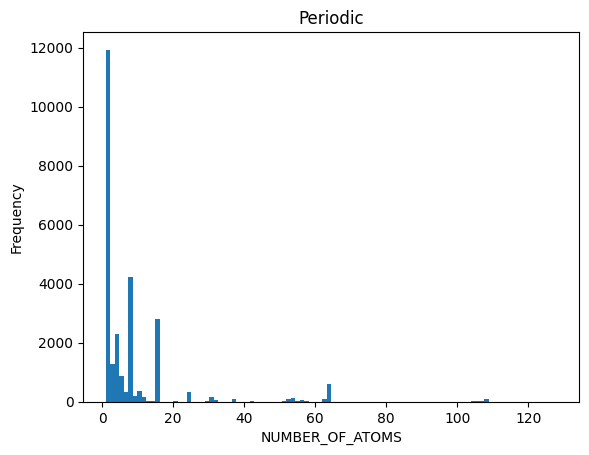

In [8]:
df.loc[df["pbc"], "NUMBER_OF_ATOMS"].plot(kind="hist", bins=100)
plt.xlabel("NUMBER_OF_ATOMS")
plt.title("Periodic")

Distribution of the non-periodic structures by number of atoms

Text(0.5, 1.0, 'Non-periodic')

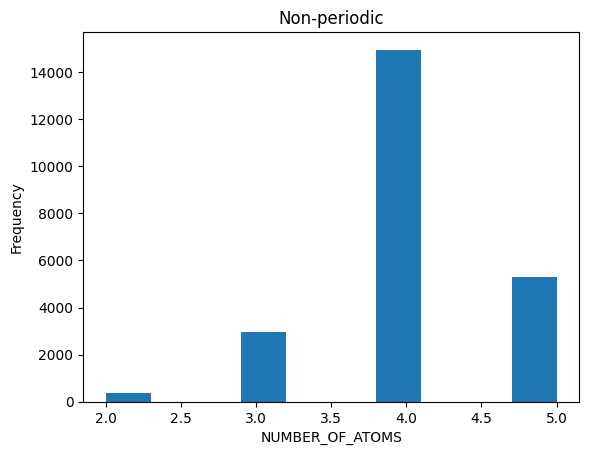

In [9]:
df.loc[~df["pbc"], "NUMBER_OF_ATOMS"].plot(kind="hist", bins=10)
plt.xlabel("NUMBER_OF_ATOMS")
plt.title("Non-periodic")

Distribution of the periodic structures by energy per atom

Text(0.5, 1.0, 'Periodic')

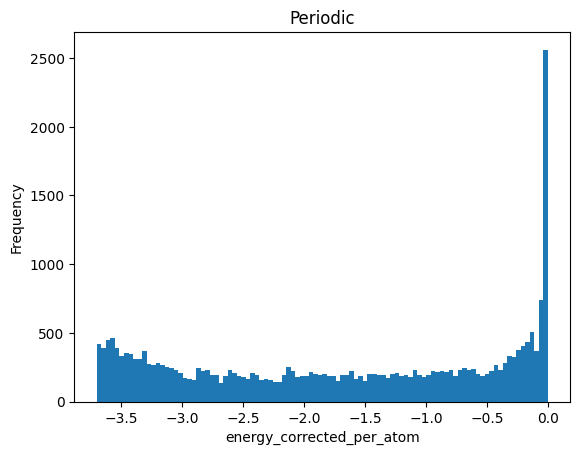

In [10]:
df.loc[df["pbc"], "energy_corrected_per_atom"].plot(kind="hist", bins=100)
plt.xlabel("energy_corrected_per_atom")
plt.title("Periodic")

Distribution of the non-periodic structures by energy per atom

Text(0.5, 1.0, 'Non-periodic')

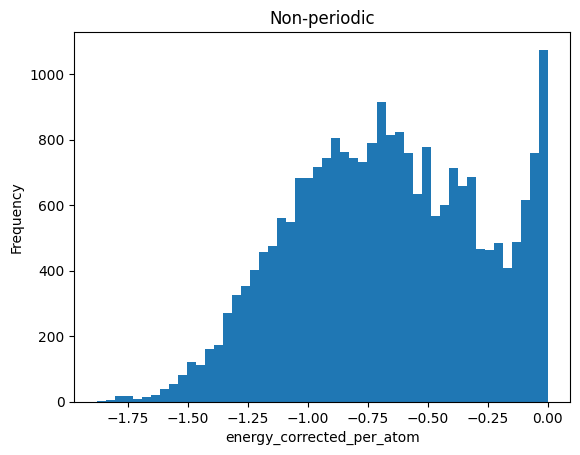

In [11]:
df.loc[~df["pbc"], "energy_corrected_per_atom"].plot(kind="hist", bins=50)
plt.xlabel("energy_corrected_per_atom")
plt.title("Non-periodic")

Text(0.5, 1.0, 'Distribution of dmin')

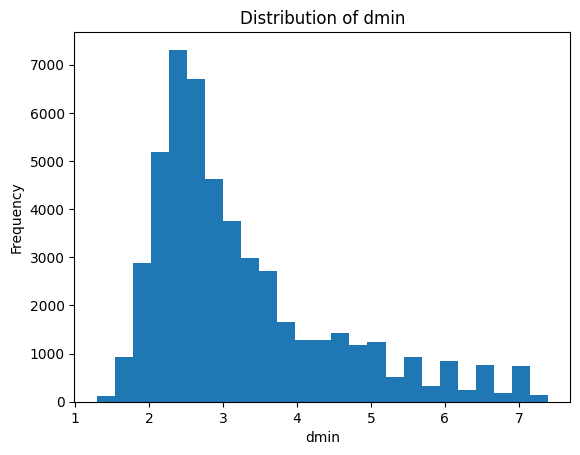

In [12]:
df["dmin"].plot(kind="hist", bins=25)
plt.xlabel("dmin")
plt.title("Distribution of dmin")

# Converting to ASE atoms

In [13]:
from ase import Atoms

In [14]:
def row_to_ase_atoms(row):
    symbols = row["_OCCUPATION"]
    pbc = row["pbc"]
    coordinates = row["_COORDINATES"]
    cell = row["cell"]

    if row["COORDINATES_TYPE"] == "relative":
        atoms = Atoms(symbols=symbols, scaled_positions=coordinates, cell=cell, pbc=pbc)
    elif row["COORDINATES_TYPE"] == "absolute":
        atoms = Atoms(symbols=symbols, positions=coordinates, pbc=pbc)
    else:
        raise ValueError("Unrecognized COORDINATES_TYPE:" + row["COORDINATES_TYPE"])
    return atoms

## Converting of one row

In [15]:
row = df.loc[0]

In [16]:
atoms = row_to_ase_atoms(row)
atoms

Atoms(symbols='Cu2', pbc=True, cell=[[4.848667, 0.0, 1.908224], [-5.7556329999999996, 3.56786, -2.470047], [0.0, 0.0, 9.175992]])

## Converting whole dataset

In [17]:
df["ase_atoms"] = df.apply(row_to_ase_atoms, axis=1)

In [19]:
df.head()
df.columns

Index(['COORDINATES_TYPE', '_COORDINATES', '_OCCUPATION', 'NUMBER_OF_ATOMS',
       'energy', 'forces', 'pbc', 'cell', 'energy_corrected',
       'energy_corrected_per_atom', 'dmin', 'w_energy', 'w_forces',
       'ase_atoms'],
      dtype='object')

In [ ]:
# Convert ASE atoms to PACE/pyace-compatible DataFrame and save
# Required columns for pyace: 'ase_atoms', 'energy' (or 'energy_corrected'), 'forces'
# Optional but useful: 'w_energy', 'w_forces', 'pbc', 'cell'

required_cols = ["ase_atoms", "forces"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns before export: {missing}")

# Build an export DataFrame that includes exactly what pyace expects
export_df = pd.DataFrame(
    {
        "ase_atoms": df["ase_atoms"],
        # pyace typically reads 'energy'; use corrected energy if available
        "energy_corrected": df["energy_corrected"],
        "energy": df['energy'],
        "forces": df["forces"],
        # optional extras
        "w_energy": df.get("w_energy", 1.0),
        "w_forces": df.get("w_forces", 1.0),
        "pbc": df["pbc"],
        "cell": df["cell"],
    }
)

# Sanity checks
assert export_df["ase_atoms"].notnull().all(), "Found null ase_atoms entries"
assert export_df["forces"].notnull().all(), "Found null forces entries"

# Save the prepared data for pyace/pacemaker
out_path = "model/pyace_dataset.pckl.gzip"
export_df.to_pickle(out_path, compression="gzip", protocol=4)
print(
    f"Saved {len(export_df)} structures to {out_path} with columns {list(export_df.columns)}"
)

Saved 50000 structures to model/pyace_dataset.pckl.gzip with columns ['ase_atoms', 'energy_corrected', 'forces', 'w_energy', 'w_forces', 'pbc', 'cell']


In [ ]:
# Build and save pyace dataset with per-atom force weights (arrays) and scalar energy weights
import numpy as np
import pandas as pd

if "ase_atoms" not in df.columns:
    raise ValueError("'ase_atoms' column is missing; run the conversion cell first.")

# Helpers


def _to_scalar_weight(x, default=1.0):
    try:
        if isinstance(x, (list, tuple, np.ndarray)):
            arr = np.asarray(x, dtype=float)
            if arr.size == 0:
                return float(default)
            return float(np.mean(arr))
        if pd.isna(x):
            return float(default)
        return float(x)
    except Exception:
        return float(default)


def _to_per_atom_array(weights, n, default=1.0):
    """Return a numpy array of length n with float weights.
    Accepts scalar, list/tuple/ndarray, or None/NaN. If a 3N-length array is given,
    reduce to per-atom by mean across xyz components.
    """
    try:
        if isinstance(weights, (list, tuple, np.ndarray)):
            arr = np.asarray(weights, dtype=float)
            if arr.ndim == 0:
                return np.full(n, float(arr), dtype=float)
            if arr.size == n:
                return arr.astype(float, copy=False)
            if arr.size == 3 * n:
                arr3 = arr.reshape(n, 3)
                # Use mean across components; alternatives: RMS or max
                return arr3.mean(axis=1).astype(float)
            # Fallback: use mean to fill per-atom
            return np.full(n, float(arr.mean()), dtype=float)
        if weights is None or (isinstance(weights, float) and np.isnan(weights)):
            return np.full(n, default, dtype=float)
        # scalar
        return np.full(n, float(weights), dtype=float)
    except Exception:
        return np.full(n, default, dtype=float)


# Build w_forces as per-atom arrays matching the number of atoms (len(forces))
wf_series = df.apply(
    lambda row: _to_per_atom_array(
        row.get("w_forces", None), n=len(row["forces"]), default=1.0
    ),
    axis=1,
)

# Build export DataFrame
export_df = pd.DataFrame(
    {
        "ase_atoms": df["ase_atoms"],
        # Use corrected energy if present; otherwise raw energy (pyace can also compute corrected from reference_energy)
        "energy_corrected": df["energy_corrected"],
        "energy_COR": df["energy"],
        "forces": df["forces"],
        "w_energy": df["w_energy"].apply(_to_scalar_weight)
        if "w_energy" in df.columns
        else 1.0,
        "w_forces": wf_series,  # per-atom numpy arrays
        "pbc": df["pbc"],
        "cell": df["cell"],
    }
)

# Sanity checks
assert export_df["ase_atoms"].notnull().all(), "Found null ase_atoms entries"
assert export_df["forces"].notnull().all(), "Found null forces entries"
# Ensure w_forces is array-like and lengths match number of atoms
lens_forces = export_df["forces"].map(len)
lens_wf = export_df["w_forces"].map(len)
assert (lens_forces == lens_wf).all(), (
    "w_forces length must match number of atoms (len(forces))"
)
# Ensure types are numpy arrays
assert all(isinstance(x, np.ndarray) for x in export_df["w_forces"]), (
    "w_forces entries must be numpy arrays"
)

out_path = "model/pyace_dataset.pckl.gzip"
export_df.to_pickle(out_path, compression="gzip", protocol=4)
print(
    f"Saved {len(export_df)} structures to {out_path}; columns: {list(export_df.columns)}"
)

Saved 50000 structures to model/pyace_dataset.pckl.gzip; columns: ['ase_atoms', 'energy_corrected', 'energy_COR', 'forces', 'w_energy', 'w_forces', 'pbc', 'cell']


In [ ]:
df

,COORDINATES_TYPE,_COORDINATES,_OCCUPATION,NUMBER_OF_ATOMS,energy,forces,pbc,cell,energy_corrected,energy_corrected_per_atom,dmin,w_energy,w_forces,ase_atoms
0,relative,"[[0.0, 0.0, 0.0], [0.8160455395, 0.0801130089,...","[Cu, Cu]",2,-9.048644e+04,"[[-0.1915810373, 0.0379360839, 0.4867174382], ...",True,"[[4.848667, 0.0, 1.908224], [-5.75563299999999...",-1.525491,-0.762745,3.556000,2.480000e-08,"[5.145e-07, 5.145e-07]","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
1,absolute,"[[0.0, 0.0, 0.0], [5.57258, 0.0, 0.0], [4.1794...","[Cu, Cu, Cu, Cu]",4,-1.809703e+05,"[[0.0698542207, 0.0068889898, 0.0002778336], [...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-0.476400,-0.119100,4.620538,1.830000e-08,"[4.822e-07, 4.467e-07, 4.207e-07, 4.4590000000...","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
2,relative,"[[0.0, 0.0, 0.0], [0.4123217421, 0.50162497540...","[Cu, Cu]",2,-9.048508e+04,"[[-0.027534297000000003, 0.1173325365, 0.14462...",True,"[[6.391525, 0.0, -2.533046], [4.143618, 6.1084...",-0.172775,-0.086388,5.080000,1.810000e-08,"[4.6140000000000004e-07, 4.6140000000000004e-07]","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
3,absolute,"[[0.0, 0.0, 0.0], [4.556401, 1.091969, -1.0795...","[Cu, Cu, Cu, Cu]",4,-1.809728e+05,"[[-0.0855274058, 2.5143827853, 2.3198918138], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-2.956170,-0.739043,1.992502,2.450000e-08,"[5.1e-08, 6.446e-07, 3.8580000000000003e-07, 4...","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
4,relative,"[[0.6496935505, 0.3274752788, 0.5129023611], [...","[Cu, Cu, Cu]",3,-1.357317e+05,"[[-0.1535250974, -0.047388247, 0.0613077861000...",True,"[[6.143789, -0.257681, -0.07058199999999999], ...",-4.343759,-1.447920,3.353072,3.640000e-08,"[9.339000000000001e-07, 9.127000000000001e-07,...","(Atom('Cu', [2.9624640000784885, 1.53561299992..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,relative,"[[0.9992060749, 0.9988812033000001, 0.00024098...","[Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, Cu, C...",64,-2.895646e+06,"[[0.7775767163, 0.8774227657, 0.8838033854], [...",True,"[[22.348278, -0.03418, 0.406474], [-0.129683, ...",-129.243905,-2.019436,2.706277,5.360000e-08,"[4.485e-07, 1.4146e-06, 6.605000000000001e-07,...","(Atom('Cu', [22.200930999913627, 22.4319909997..."
49996,absolute,"[[0.0, 0.0, 0.0], [1.2465, 1.2465, 1.2465], [2...","[Cu, Cu, Cu, Cu]",4,-1.809751e+05,"[[-0.32807977050000003, -0.3364480854, -0.3465...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-5.288324,-1.322081,2.159001,3.370000e-08,"[6.646000000000001e-07, 6.208000000000001e-07,...","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
49997,absolute,"[[0.0, 0.0, 0.0], [3.07959, 0.0, 0.0], [4.6193...","[Cu, Cu, Cu, Cu]",4,-1.809718e+05,"[[1.3767464346, -0.0029550472, -0.0025562335],...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-1.955557,-0.488889,3.079590,2.170000e-08,"[1.98e-07, 1.997e-07, 4.575e-07, 4.58000000000...","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."
49998,absolute,"[[0.0, 0.0, 0.0], [4.49013, 0.0, 0.0], [0.0, 2...","[Cu, Cu, Cu, Cu, Cu]",5,-2.262168e+05,"[[0.4589911486, -0.1556204391, 1.4022477784], ...",False,"[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",-4.513183,-0.902637,3.174994,2.670000e-08,"[2.203e-07, 3.186e-07, 3.199e-07, 2.6750000000...","(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('C..."


In [ ]:
# Create a filtered pyace dataset to improve optimization stability
import numpy as np
import pandas as pd

if 'ase_atoms' not in df.columns:
    raise ValueError("'ase_atoms' column is missing; run the conversion cell first.")

# Compute per-structure max force norm (eV/Ang)
max_fnorm = df['forces'].apply(lambda F: float(np.max(np.linalg.norm(np.asarray(F, dtype=float), axis=1))))

# Filtering thresholds (tweakable)
DMIN_MIN = 2.0          # Angstrom; remove structures with very close contacts
FMAX_MAX = 10.0         # eV/Ang; remove extreme-force outliers

mask = (df['dmin'] >= DMIN_MIN) & (max_fnorm <= FMAX_MAX)
print(f"Filtering: kept {mask.sum()} / {len(df)} structures (dmin >= {DMIN_MIN}, max|F| <= {FMAX_MAX} eV/A)")

# Helper: per-atom force weights (arrays) and scalar energy weights

def _to_scalar_weight(x, default=1.0):
    try:
        if isinstance(x, (list, tuple, np.ndarray)):
            arr = np.asarray(x, dtype=float)
            if arr.size == 0:
                return float(default)
            return float(np.mean(arr))
        if pd.isna(x):
            return float(default)
        return float(x)
    except Exception:
        return float(default)


def _to_per_atom_array(weights, n, default=1.0):
    try:
        if isinstance(weights, (list, tuple, np.ndarray)):
            arr = np.asarray(weights, dtype=float)
            if arr.ndim == 0:
                return np.full(n, float(arr), dtype=float)
            if arr.size == n:
                return arr.astype(float, copy=False)
            if arr.size == 3 * n:
                arr3 = arr.reshape(n, 3)
                return arr3.mean(axis=1).astype(float)
            return np.full(n, float(arr.mean()), dtype=float)
        if weights is None or (isinstance(weights, float) and np.isnan(weights)):
            return np.full(n, default, dtype=float)
        return np.full(n, float(weights), dtype=float)
    except Exception:
        return np.full(n, default, dtype=float)

# Build filtered export
sel = df[mask].reset_index(drop=True)
wf_series = sel.apply(lambda row: _to_per_atom_array(row.get('w_forces', None), n=len(row['forces']), default=1.0), axis=1)

export_df = pd.DataFrame({
    'ase_atoms': sel['ase_atoms'],
    'energy_corrected': sel['energy_corrected'],
    'forces': sel['forces'],
    'w_energy': sel['w_energy'].apply(_to_scalar_weight) if 'w_energy' in sel.columns else 1.0,
    'w_forces': wf_series,
    'pbc': sel['pbc'],
    'cell': sel['cell'],
})

# Checks
assert export_df['ase_atoms'].notnull().all()
assert export_df['forces'].notnull().all()
assert (export_df['forces'].map(len) == export_df['w_forces'].map(len)).all()

out_path = 'model/pyace_dataset_filtered.pckl.gzip'
export_df.to_pickle(out_path, compression='gzip', protocol=4)
print(f"Saved filtered dataset with {len(export_df)} structures to {out_path}")

Filtering: kept 46339 / 50000 structures (dmin >= 2.0, max|F| <= 10.0 eV/A)
Saved filtered dataset with 46339 structures to model/pyace_dataset_filtered.pckl.gzip


In [ ]:
# Quick check: does the saved dataset contain a proper 'energy_corrected' column?
import pandas as pd
import numpy as np

pickle_path = "/Users/pranavagrawal/Documents/GitHub/ACE/model/pyace_dataset_filtered.pckl.gzip"
try:
    ds = pd.read_pickle(pickle_path, compression="gzip")
except Exception as e:
    raise RuntimeError(f"Failed to read pickle at {pickle_path}: {e}")

cols = list(ds.columns)
print("Columns:", cols)

has_ec = "energy_corrected" in ds.columns
print("Has energy_corrected column:", has_ec)

if has_ec:
    # Check scalar floats and finiteness
    is_scalar = ds["energy_corrected"].map(np.isscalar).all()
    is_finite = np.isfinite(ds["energy_corrected"]).all()
    print("energy_corrected scalar per row:", is_scalar)
    print("energy_corrected all finite:", is_finite)
    print(ds[["energy_corrected"]].head())
else:
    print("energy_corrected missing — re-run the export cell that writes the filtered pickle,\n"
          "ensuring it sets 'energy_corrected' explicitly (total energy in eV).")

Columns: ['ase_atoms', 'energy_corrected', 'forces', 'w_energy', 'w_forces', 'pbc', 'cell']
Has energy_corrected column: True
energy_corrected scalar per row: True
energy_corrected all finite: True
   energy_corrected
0         -1.525491
1         -0.476400
2         -0.172775
3         -4.343759
4         -4.849193


In [ ]:
# Build a stricter filtered dataset to avoid NaN forces during training
import numpy as np
import pandas as pd

if 'ase_atoms' not in df.columns:
    raise ValueError("'ase_atoms' column is missing; run the conversion cell first.")

# Compute per-structure max force norm (eV/Å)
max_fnorm = df['forces'].apply(lambda F: float(np.max(np.linalg.norm(np.asarray(F, dtype=float), axis=1))))

# Stricter thresholds for stability
DMIN_MIN = 2.2   # Å
FMAX_MAX = 6.0   # eV/Å
mask_strict = (df['dmin'] >= DMIN_MIN) & (max_fnorm <= FMAX_MAX)
print(f"Strict filtering: kept {mask_strict.sum()} / {len(df)} structures (dmin >= {DMIN_MIN}, max|F| <= {FMAX_MAX} eV/Å)")

# Helpers (reuse from earlier cells if defined)
def _to_scalar_weight(x, default=1.0):
    try:
        if isinstance(x, (list, tuple, np.ndarray)):
            arr = np.asarray(x, dtype=float)
            if arr.size == 0:
                return float(default)
            return float(np.mean(arr))
        if pd.isna(x):
            return float(default)
        return float(x)
    except Exception:
        return float(default)


def _to_per_atom_array(weights, n, default=1.0):
    try:
        if isinstance(weights, (list, tuple, np.ndarray)):
            arr = np.asarray(weights, dtype=float)
            if arr.ndim == 0:
                return np.full(n, float(arr), dtype=float)
            if arr.size == n:
                return arr.astype(float, copy=False)
            if arr.size == 3 * n:
                arr3 = arr.reshape(n, 3)
                return arr3.mean(axis=1).astype(float)
            return np.full(n, float(arr.mean()), dtype=float)
        if weights is None or (isinstance(weights, float) and np.isnan(weights)):
            return np.full(n, default, dtype=float)
        return np.full(n, float(weights), dtype=float)
    except Exception:
        return np.full(n, default, dtype=float)

sel = df[mask_strict].reset_index(drop=True)
wf_series = sel.apply(lambda row: _to_per_atom_array(row.get('w_forces', None), n=len(row['forces']), default=1.0), axis=1)

export_df = pd.DataFrame({
    'ase_atoms': sel['ase_atoms'],
    'energy_corrected': sel['energy_corrected'] if 'energy_corrected' in sel.columns else sel['energy'],
    'forces': sel['forces'],
    'w_energy': sel['w_energy'].apply(_to_scalar_weight) if 'w_energy' in sel.columns else 1.0,
    'w_forces': wf_series,
    'pbc': sel['pbc'],
    'cell': sel['cell'],
})

# Checks
assert export_df['ase_atoms'].notnull().all()
assert export_df['energy_corrected'].notnull().all()
assert export_df['forces'].notnull().all()
assert (export_df['forces'].map(len) == export_df['w_forces'].map(len)).all()

out_path_strict = 'model/pyace_dataset_filtered_strict.pckl.gzip'
export_df.to_pickle(out_path_strict, compression='gzip', protocol=4)
print(f"Saved stricter filtered dataset with {len(export_df)} structures to {out_path_strict}")

Strict filtering: kept 42056 / 50000 structures (dmin >= 2.2, max|F| <= 6.0 eV/Å)
Saved stricter filtered dataset with 42056 structures to model/pyace_dataset_filtered_strict.pckl.gzip


In [ ]:
import gzip, pickle, numpy as np, pandas as pd

# p = "/Users/pranavagrawal/Documents/GitHub/ACE/model/pyace_dataset_filtered_strict.pckl.gzip"
# with gzip.open(p,'rb') as f:
#     df = pickle.load(f)

# detect columns (adjust names if different)
Ecol = 'energy_corrected_per_atom'                  # raw totals used with reference_energy: auto
Fcol = 'forces'                  # array-like per entry: shape (natoms,3)
natoms = df['NUMBER_OF_ATOMS']
E_total = df[Ecol].to_numpy()

# flatten force components across dataset
F_comp = np.hstack([np.asarray(f).ravel() for f in df[Fcol]])

rms_E_atom = np.sqrt(np.mean(E_total**2))
rms_F_comp = np.sqrt(np.mean(F_comp**2))

print("rms_E_per_atom (eV):", rms_E_atom)
print("rms_F_per_component (eV/Å):", rms_F_comp)
suggested_w_forces = (rms_E_atom**2) / (rms_F_comp**2)
print("suggested w_forces multiplier ≈", suggested_w_forces)

rms_E_per_atom (eV): 1.6198308202849774
rms_F_per_component (eV/Å): 1.4820769444011328
suggested w_forces multiplier ≈ 1.1945320683382856


In [ ]:
E_per_atom 

NameError: name 'E_per_atom' is not defined